<a href="https://colab.research.google.com/github/auerbachsd/NLSeer/blob/main/PSSM_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# Replace this by protein sequences
aligned_sequences = [
    "MKTWV",
    "MRTWV",
    "MKTWA",
    "MKTWV"
]

In [10]:
def create_pssm(aligned_sequences):
    # Initialize a dictionary to hold counts for each amino acid at each position.
    position_counts = defaultdict(lambda: defaultdict(int))
    sequence_length = len(aligned_sequences[0])
    num_sequences = len(aligned_sequences)

    # Count the occurrences of each amino acid at each position.
    for seq in aligned_sequences:
        for position, amino_acid in enumerate(seq):
            position_counts[position][amino_acid] += 1

    # Convert counts to frequencies.
    pssm = defaultdict(dict)
    for position in position_counts:
        for amino_acid in position_counts[position]:
            pssm[position][amino_acid] = position_counts[position][amino_acid] / num_sequences

    # Convert the PSSM to a DataFrame for better visualization.
    pssm_df = pd.DataFrame(pssm).fillna(0)  # Fill missing values with 0.
    return pssm_df

# Create PSSM
pssm_df = create_pssm(aligned_sequences)
pssm_df_transposed = pssm_df.transpose()
print(pssm_df_transposed)

     M     K     R    T    W     V     A
0  1.0  0.00  0.00  0.0  0.0  0.00  0.00
1  0.0  0.75  0.25  0.0  0.0  0.00  0.00
2  0.0  0.00  0.00  1.0  0.0  0.00  0.00
3  0.0  0.00  0.00  0.0  1.0  0.00  0.00
4  0.0  0.00  0.00  0.0  0.0  0.75  0.25


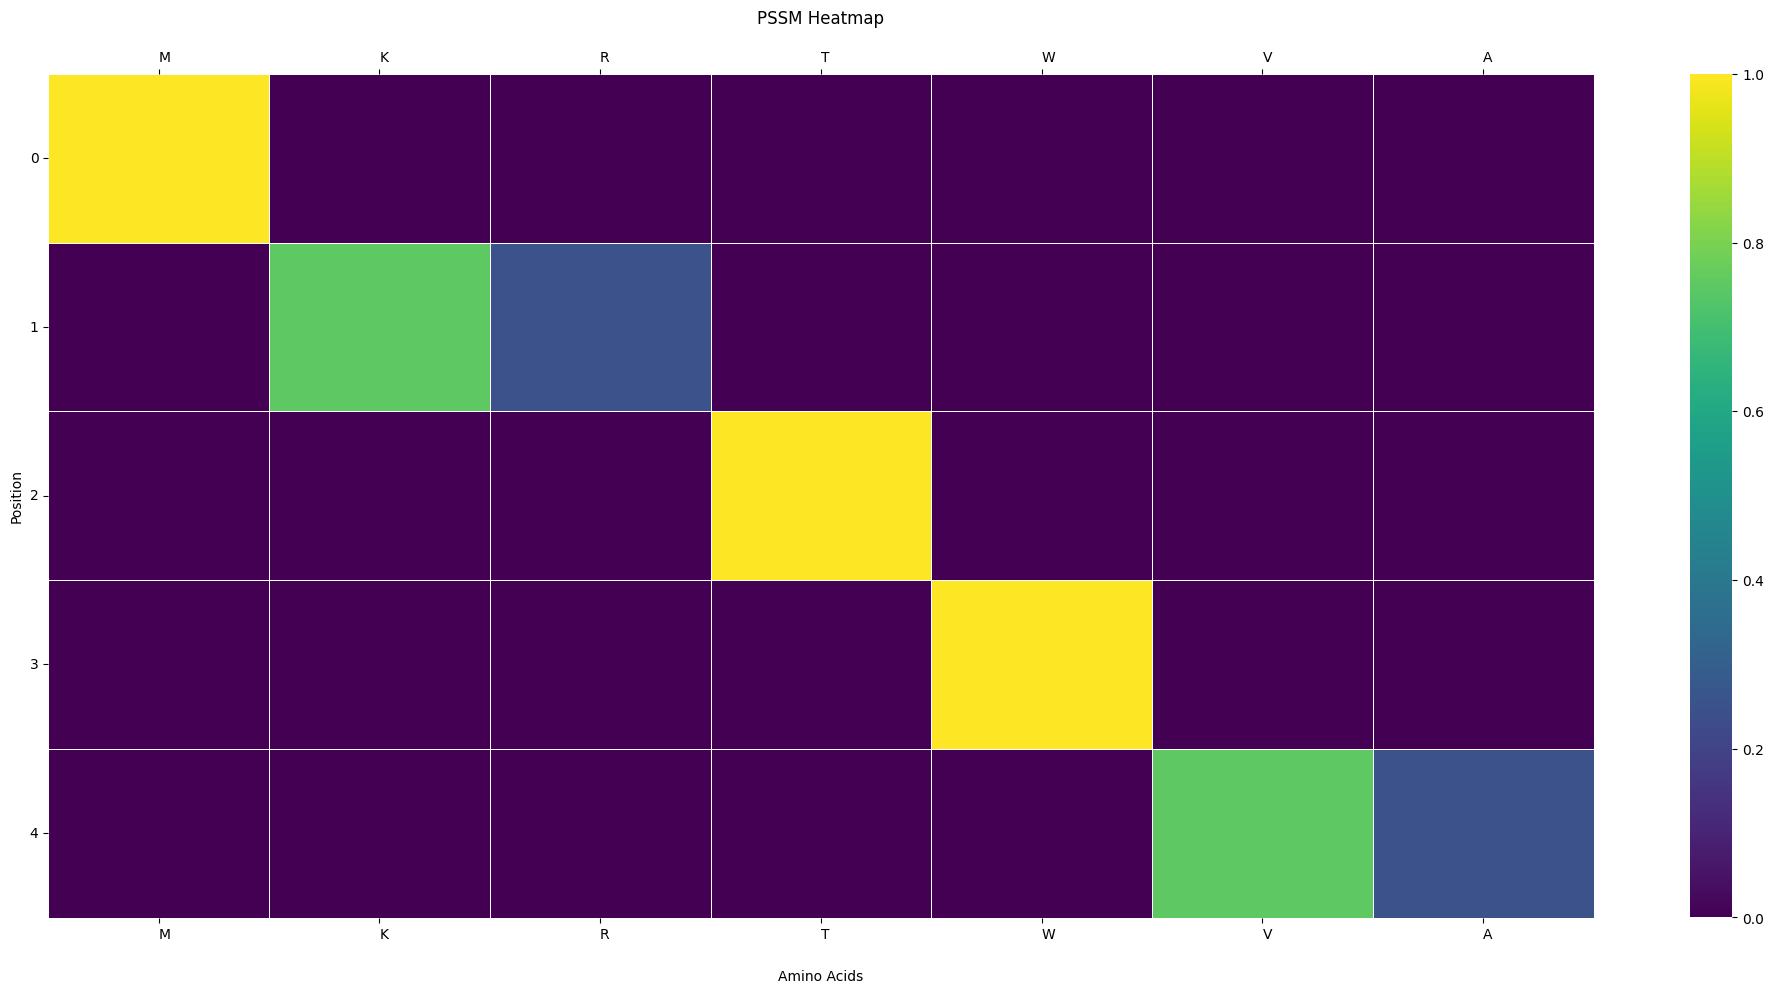

In [27]:
# Plot customized heatmap
plt.figure(figsize=(20, 10))
ax = sns.heatmap(pssm_df_transposed, annot=False, cmap='viridis', linewidths=.5,
                 xticklabels=pssm_df_transposed.columns)


ax.xaxis.tick_top()

ax.set_xticklabels(pssm_df_transposed.columns, ha="left")
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, labeltop=True)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Title and labels
plt.title('PSSM Heatmap', y=1.05)
plt.xlabel('Amino Acids', labelpad=20)
plt.ylabel('Position')

plt.tight_layout()

plt.show()

In [30]:

# Convert DataFrame to Numpy Array
matrix = pssm_df_transposed.values

# Perform SVD
U, S, VT = np.linalg.svd(matrix, full_matrices=False)  # full_matrices=False for reduced form

In [32]:
print(U)
print()
print(S)
print()
print(VT)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]

[1.         1.         1.         0.79056942 0.79056942]

[[-0.         -0.          0.          1.         -0.          0.
   0.        ]
 [ 1.          0.          0.          0.          0.          0.
   0.        ]
 [-0.         -0.         -0.          0.          1.          0.
   0.        ]
 [-0.         -0.         -0.         -0.          0.          0.9486833
   0.31622777]
 [-0.          0.9486833   0.31622777 -0.         -0.          0.
   0.        ]]
